In [2]:
#basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
train_df = pd.read_csv('train.csv',index_col=0)
test_df = pd.read_csv('test.csv',index_col=0)

In [4]:
train_df.head()

Temparature  Humidity  Moisture Soil Type  Crop Type  Nitrogen  Potassium  \
id                                                                              
0            37        70        36    Clayey  Sugarcane        36          4   
1            27        69        65     Sandy    Millets        30          6   
2            29        63        32     Sandy    Millets        24         12   
3            35        62        54     Sandy     Barley        39         12   
4            35        58        43       Red      Paddy        37          2   

    Phosphorous Fertilizer Name  
id                               
0             5           28-28  
1            18           28-28  
2            16        17-17-17  
3             4        10-26-26  
4            16             DAP

In [5]:
test_df.head()

Temparature  Humidity  Moisture Soil Type    Crop Type  Nitrogen  \
id                                                                         
750000           31        70        52     Sandy        Wheat        34   
750001           27        62        45       Red    Sugarcane        30   
750002           28        72        28    Clayey  Ground Nuts        14   
750003           37        53        57     Black  Ground Nuts        18   
750004           31        55        32       Red       Pulses        13   

        Potassium  Phosphorous  
id                              
750000         11           24  
750001         14           15  
750002         15            4  
750003         17           36  
750004         19           14

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Temparature      750000 non-null  int64 
 1   Humidity         750000 non-null  int64 
 2   Moisture         750000 non-null  int64 
 3   Soil Type        750000 non-null  object
 4   Crop Type        750000 non-null  object
 5   Nitrogen         750000 non-null  int64 
 6   Potassium        750000 non-null  int64 
 7   Phosphorous      750000 non-null  int64 
 8   Fertilizer Name  750000 non-null  object
dtypes: int64(6), object(3)
memory usage: 57.2+ MB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250000 entries, 750000 to 999999
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Temparature  250000 non-null  int64 
 1   Humidity     250000 non-null  int64 
 2   Moisture     250000 non-null  int64 
 3   Soil Type    250000 non-null  object
 4   Crop Type    250000 non-null  object
 5   Nitrogen     250000 non-null  int64 
 6   Potassium    250000 non-null  int64 
 7   Phosphorous  250000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 17.2+ MB


In [8]:
train_df.describe()

Temparature       Humidity       Moisture       Nitrogen  \
count  750000.000000  750000.000000  750000.000000  750000.000000   
mean       31.503565      61.038912      45.184147      23.093808   
std         4.025574       6.647695      11.794594      11.216125   
min        25.000000      50.000000      25.000000       4.000000   
25%        28.000000      55.000000      35.000000      13.000000   
50%        32.000000      61.000000      45.000000      23.000000   
75%        35.000000      67.000000      55.000000      33.000000   
max        38.000000      72.000000      65.000000      42.000000   

           Potassium    Phosphorous  
count  750000.000000  750000.000000  
mean        9.478296      21.073227  
std         5.765622      12.346831  
min         0.000000       0.000000  
25%         4.000000      10.000000  
50%         9.000000      21.000000  
75%        14.000000      32.000000  
max        19.000000      42.000000

In [9]:
from ydata_profiling import ProfileReport
report = ProfileReport(train_df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
train_df.isna().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [11]:
test_df.isna().sum()

Temparature    0
Humidity       0
Moisture       0
Soil Type      0
Crop Type      0
Nitrogen       0
Potassium      0
Phosphorous    0
dtype: int64

### •	NPK_Ratio = Nitrogen / (Phosphorous + Potassium + 1)
### •	N_to_P = Nitrogen / (Phosphorous + 1)
### 	•	K_to_P = Potassium / (Phosphorous + 1)


In [12]:
#creating an exp dataframe to add these values
train_df_exp = pd.read_csv('train.csv',index_col=0)
test_df_exp = pd.read_csv('test.csv',index_col=0)

In [13]:
train_df_exp['NPK_Ratio'] = train_df_exp['Nitrogen'] / (train_df_exp['Potassium']+train_df_exp['Phosphorous']+1)
train_df_exp['N_to_P'] = train_df_exp['Nitrogen']/(train_df_exp['Phosphorous']+1)
train_df_exp['K_to_P'] = train_df_exp['Potassium']/(train_df_exp['Phosphorous']+1)

In [14]:
test_df_exp['NPK_Ratio'] = test_df_exp['Nitrogen'] / (test_df_exp['Potassium']+test_df_exp['Phosphorous']+1)
test_df_exp['N_to_P'] = test_df_exp['Nitrogen']/(test_df_exp['Phosphorous']+1)
test_df_exp['K_to_P'] = test_df_exp['Potassium']/(test_df_exp['Phosphorous']+1)

In [15]:
train_df_exp.head()

Temparature  Humidity  Moisture Soil Type  Crop Type  Nitrogen  Potassium  \
id                                                                              
0            37        70        36    Clayey  Sugarcane        36          4   
1            27        69        65     Sandy    Millets        30          6   
2            29        63        32     Sandy    Millets        24         12   
3            35        62        54     Sandy     Barley        39         12   
4            35        58        43       Red      Paddy        37          2   

    Phosphorous Fertilizer Name  NPK_Ratio    N_to_P    K_to_P  
id                                                              
0             5           28-28   3.600000  6.000000  0.666667  
1            18           28-28   1.200000  1.578947  0.315789  
2            16        17-17-17   0.827586  1.411765  0.705882  
3             4        10-26-26   2.294118  7.800000  2.400000  
4            16             DAP   1.947368  2.176471  0.117647

In [16]:
#water stress 
train_df_exp['Water_Stress'] = train_df_exp['Moisture']/(train_df_exp['Temparature']+1)
test_df_exp['Water_Stress'] = test_df_exp['Moisture']/(test_df_exp['Temparature']+1)

In [17]:
train_df_exp.head()

Temparature  Humidity  Moisture Soil Type  Crop Type  Nitrogen  Potassium  \
id                                                                              
0            37        70        36    Clayey  Sugarcane        36          4   
1            27        69        65     Sandy    Millets        30          6   
2            29        63        32     Sandy    Millets        24         12   
3            35        62        54     Sandy     Barley        39         12   
4            35        58        43       Red      Paddy        37          2   

    Phosphorous Fertilizer Name  NPK_Ratio    N_to_P    K_to_P  Water_Stress  
id                                                                            
0             5           28-28   3.600000  6.000000  0.666667      0.947368  
1            18           28-28   1.200000  1.578947  0.315789      2.321429  
2            16        17-17-17   0.827586  1.411765  0.705882      1.066667  
3             4        10-26-26   2.294118  7.800000  2.400000      1.500000  
4            16             DAP   1.947368  2.176471  0.117647      1.194444

### visualizations

In [18]:
#sample df for vis
vis_df = train_df_exp.sample(frac=0.1,random_state=43)

In [19]:
def plot_box(df):
    numerical_cols = list(df.select_dtypes(include='number').columns)
    num_plots = len(numerical_cols)
    nrows = (num_plots+1)//2
    ncols = 2
    fig, axes = plt.subplots(figsize=(30,60),nrows=nrows,ncols=ncols,facecolor='black')
    for i,column in enumerate(numerical_cols):
        row = i//2
        col = i%2
        ax = axes[row,col]
        ax.set_facecolor('black')
        sns.boxplot(x='Fertilizer Name',y=column,data=df,palette='rocket', linewidth=5.5, saturation=0.9,ax=ax,width=0.55)
        ax.set_title(f'Boxplot of {column}', color='white', fontsize=17, weight='bold')
        ax.set_xlabel(f'{column}', color='white', fontsize=15)
        ax.set_ylabel('Values', color='white', fontsize=15)
        
        ax.tick_params(axis='x', colors='white', labelsize=13)
        ax.tick_params(axis='y', colors='white', labelsize=13)
        
        for spine in ax.spines.values():
            spine.set_edgecolor('white')
        
        # Handle legend if present
        legend = ax.get_legend()
        if legend is not None:
            legend.get_frame().set_facecolor('black')
            legend.get_frame().set_edgecolor('white')
            plt.setp(legend.get_texts(), color='white')
    plt.tight_layout()
    plt.show()

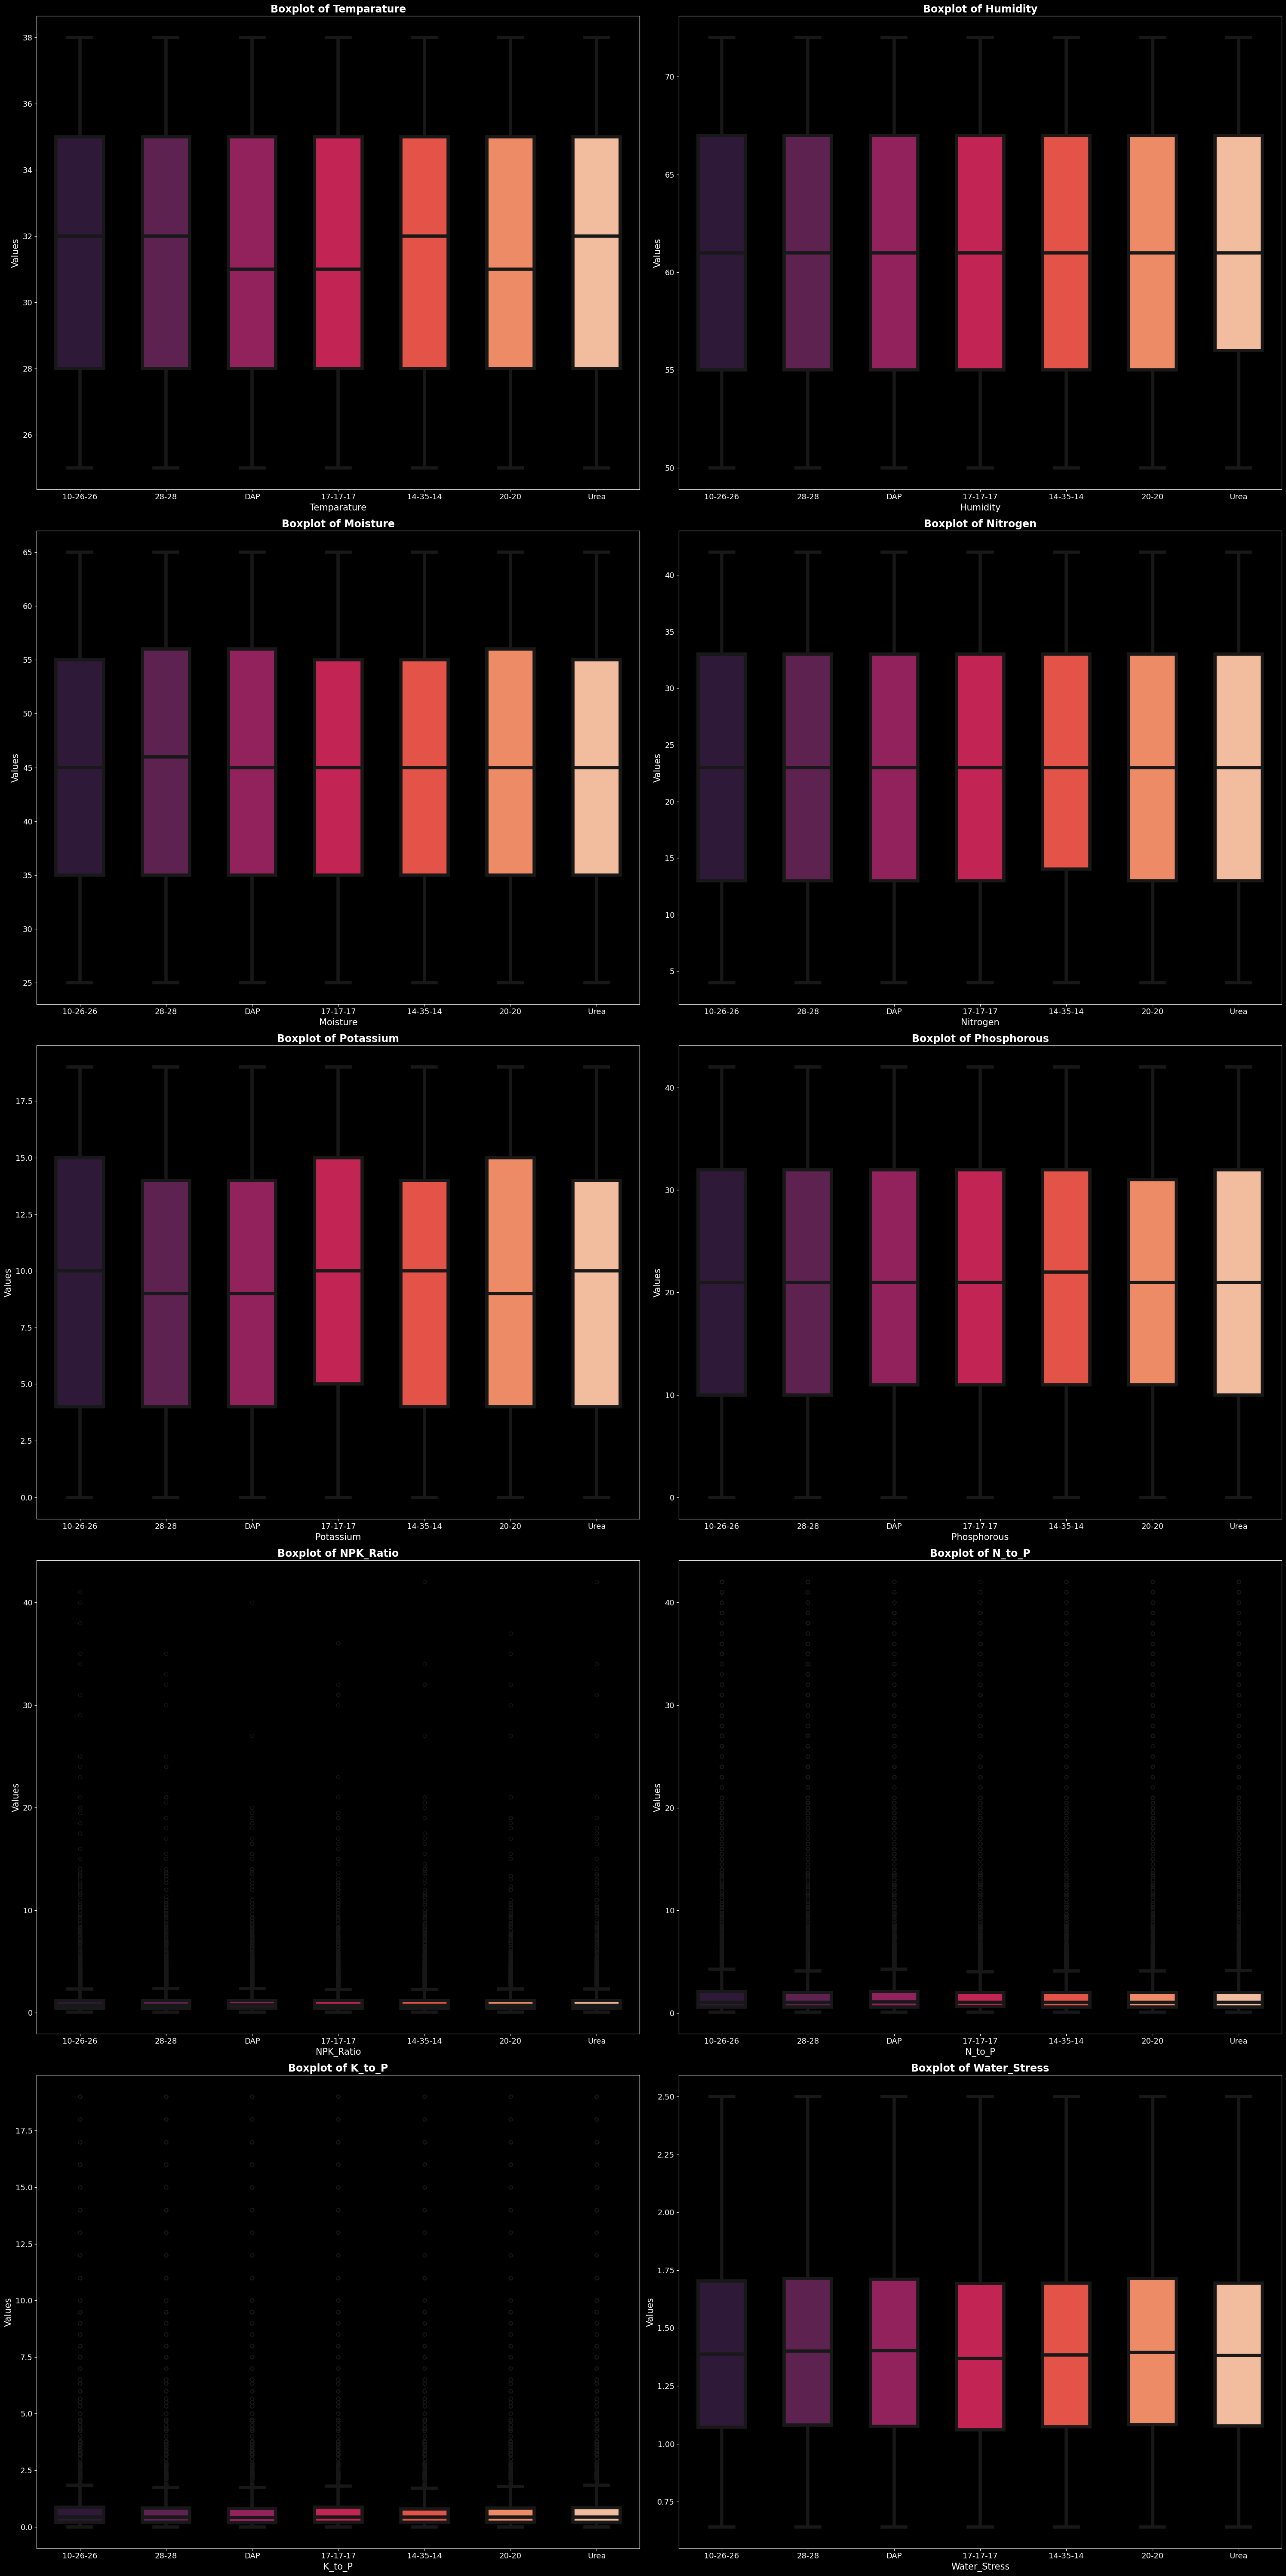

In [20]:
plot_box(vis_df)

In [21]:
def plot_dist(df):
    numerical_cols = list(df.select_dtypes(include='number').columns)
    num_plots = len(numerical_cols)
    nrows = (num_plots+1)//2
    ncols = 2
    fig, axes = plt.subplots(figsize=(30,60),nrows=nrows,ncols=ncols,facecolor='black')
    for i,column in enumerate(numerical_cols):
        row = i//2
        col = i%2
        ax = axes[row,col]
        ax.set_facecolor('black')
        sns.histplot(x=column,data=df,palette='winter',ax=ax,kde=True,bins=60)
        ax.set_title(f'Distplot of {column}', color='white', fontsize=17, weight='bold')
        ax.set_xlabel(f'{column}', color='white', fontsize=15)
        ax.set_ylabel('Values', color='white', fontsize=15)
        
        ax.tick_params(axis='x', colors='white', labelsize=13)
        ax.tick_params(axis='y', colors='white', labelsize=13)
        
        for spine in ax.spines.values():
            spine.set_edgecolor('white')
        
        # Handle legend if present
        legend = ax.get_legend()
        if legend is not None:
            legend.get_frame().set_facecolor('black')
            legend.get_frame().set_edgecolor('white')
            plt.setp(legend.get_texts(), color='white')
    plt.tight_layout()
    plt.show()

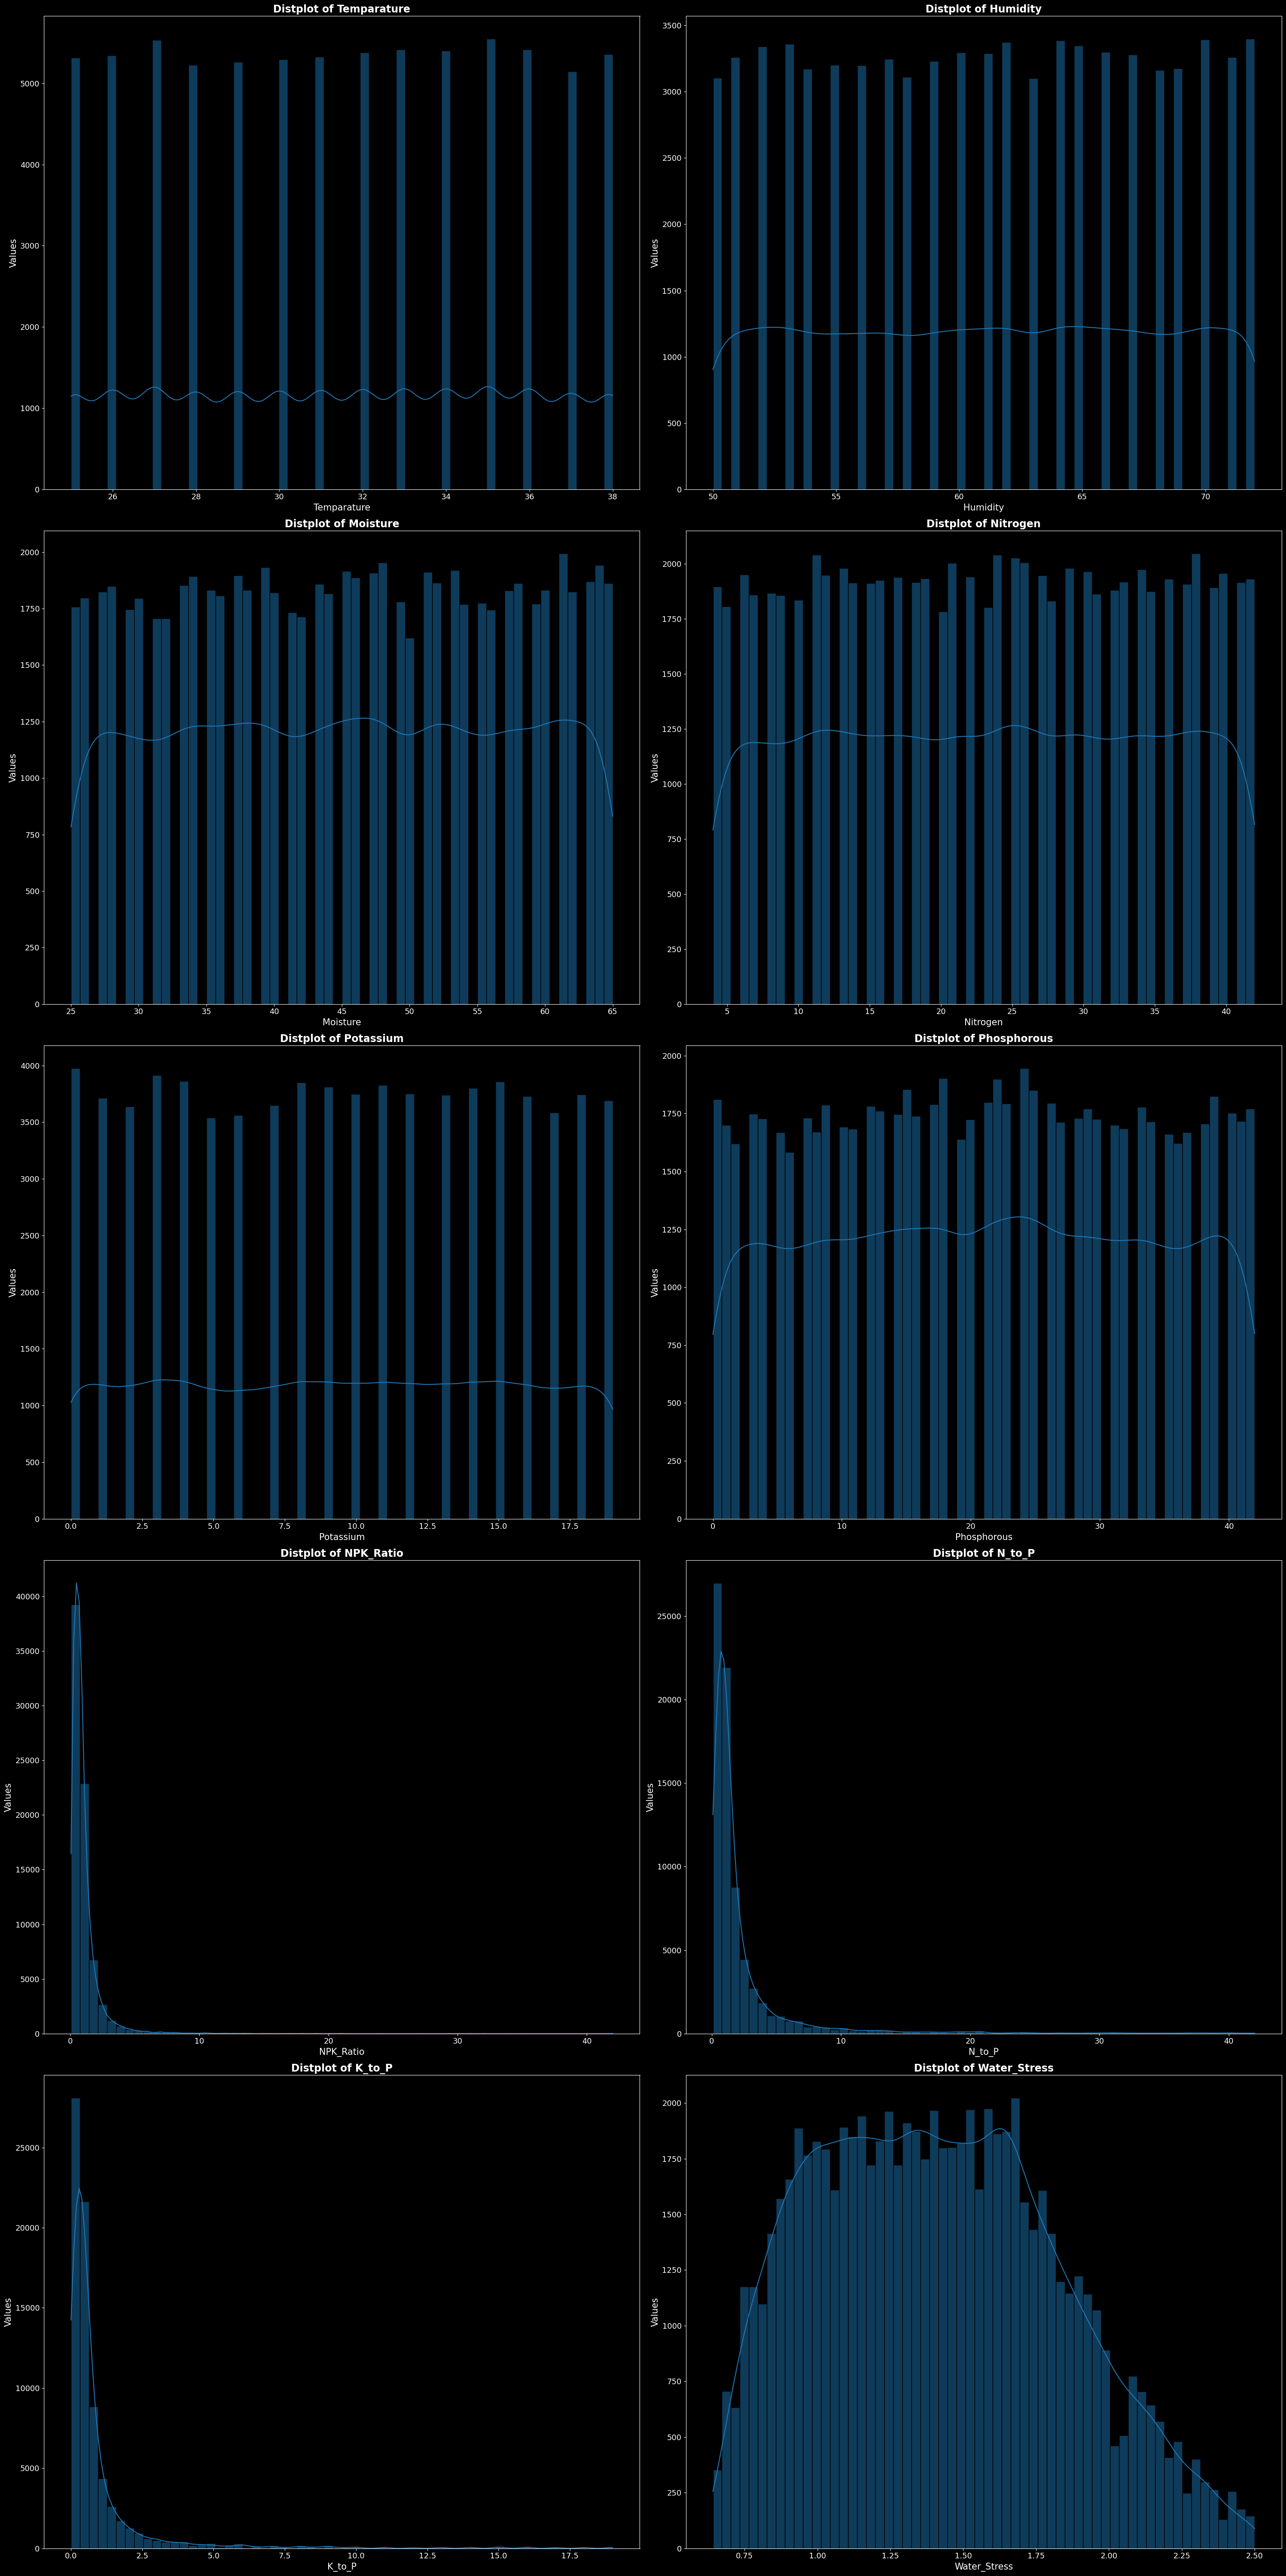

In [22]:
plot_dist(vis_df)

In [23]:
def plot_count(df):
    cat_cols = ['Soil Type','Crop Type','Fertilizer Name']
    num_plots = len(cat_cols)
    nrows = (num_plots+1)//2
    ncols = 2
    fig, axes = plt.subplots(figsize=(20,20),nrows=nrows,ncols=ncols,facecolor='black')
    for i,column in enumerate(cat_cols):
        row = i//2
        col = i%2
        ax = axes[row,col]
        ax.set_facecolor('black')
        sns.countplot(x=df[column],palette='viridis',ax=ax)
        ax.set_title(f'Distplot of {column}', color='white', fontsize=14, weight='bold')
        ax.set_xlabel(f'{column}', color='white', fontsize=12)
        ax.set_ylabel('Values', color='white', fontsize=12)
        
        ax.tick_params(axis='x', colors='white', labelsize=10)
        ax.tick_params(axis='y', colors='white', labelsize=10)
        
        for spine in ax.spines.values():
            spine.set_edgecolor('white')
        
        # Handle legend if present
        legend = ax.get_legend()
        if legend is not None:
            legend.get_frame().set_facecolor('black')
            legend.get_frame().set_edgecolor('white')
            plt.setp(legend.get_texts(), color='white')
    plt.tight_layout()
    plt.show()

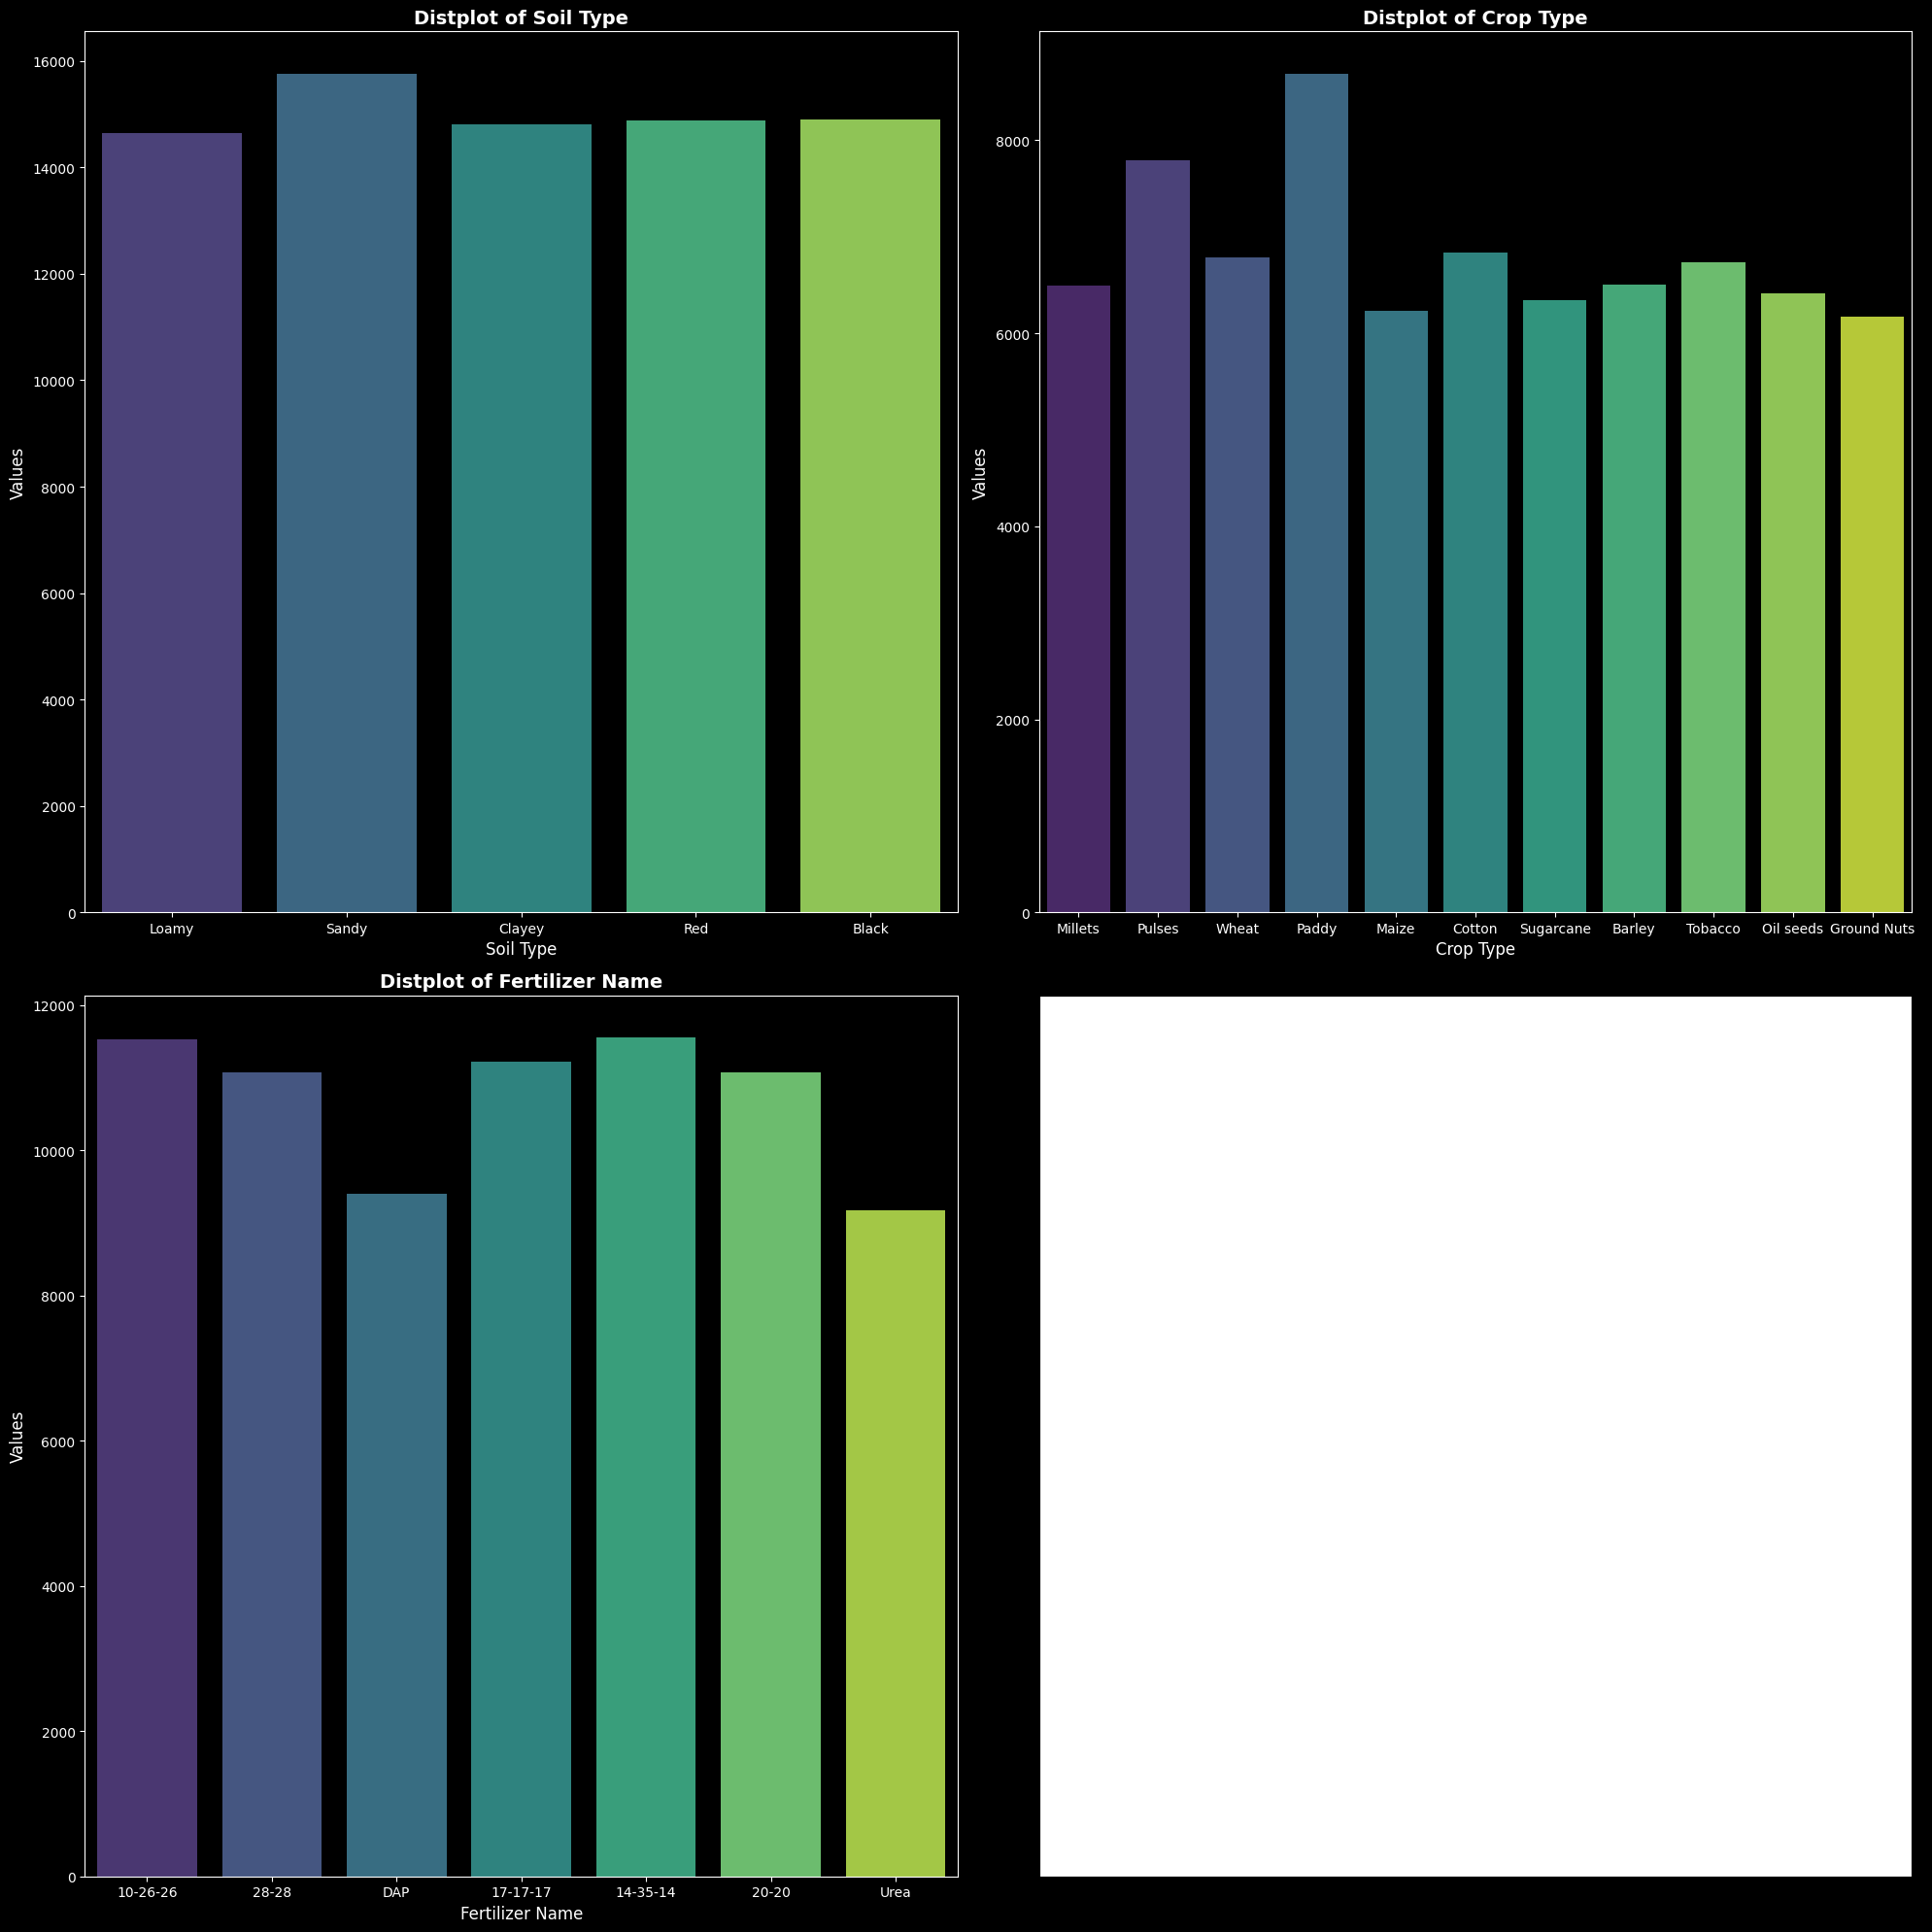

In [24]:
plot_count(vis_df)

### Scaling and One hot encoding

In [25]:
train_df_exp = pd.get_dummies(train_df_exp,columns=['Soil Type','Crop Type'],drop_first=True)
test_df_exp = pd.get_dummies(test_df_exp,columns = ['Soil Type','Crop Type'],drop_first=True)
train_df = pd.get_dummies(train_df,columns=['Soil Type','Crop Type'],drop_first=True)
test_df= pd.get_dummies(test_df,columns = ['Soil Type','Crop Type'],drop_first=True)

In [26]:
train_df_exp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Temparature            750000 non-null  int64  
 1   Humidity               750000 non-null  int64  
 2   Moisture               750000 non-null  int64  
 3   Nitrogen               750000 non-null  int64  
 4   Potassium              750000 non-null  int64  
 5   Phosphorous            750000 non-null  int64  
 6   Fertilizer Name        750000 non-null  object 
 7   NPK_Ratio              750000 non-null  float64
 8   N_to_P                 750000 non-null  float64
 9   K_to_P                 750000 non-null  float64
 10  Water_Stress           750000 non-null  float64
 11  Soil Type_Clayey       750000 non-null  bool   
 12  Soil Type_Loamy        750000 non-null  bool   
 13  Soil Type_Red          750000 non-null  bool   
 14  Soil Type_Sandy        750000 non-null  b

In [27]:
test_df_exp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250000 entries, 750000 to 999999
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Temparature            250000 non-null  int64  
 1   Humidity               250000 non-null  int64  
 2   Moisture               250000 non-null  int64  
 3   Nitrogen               250000 non-null  int64  
 4   Potassium              250000 non-null  int64  
 5   Phosphorous            250000 non-null  int64  
 6   NPK_Ratio              250000 non-null  float64
 7   N_to_P                 250000 non-null  float64
 8   K_to_P                 250000 non-null  float64
 9   Water_Stress           250000 non-null  float64
 10  Soil Type_Clayey       250000 non-null  bool   
 11  Soil Type_Loamy        250000 non-null  bool   
 12  Soil Type_Red          250000 non-null  bool   
 13  Soil Type_Sandy        250000 non-null  bool   
 14  Crop Type_Cotton       250000 non-nu

In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Temparature            750000 non-null  int64 
 1   Humidity               750000 non-null  int64 
 2   Moisture               750000 non-null  int64 
 3   Nitrogen               750000 non-null  int64 
 4   Potassium              750000 non-null  int64 
 5   Phosphorous            750000 non-null  int64 
 6   Fertilizer Name        750000 non-null  object
 7   Soil Type_Clayey       750000 non-null  bool  
 8   Soil Type_Loamy        750000 non-null  bool  
 9   Soil Type_Red          750000 non-null  bool  
 10  Soil Type_Sandy        750000 non-null  bool  
 11  Crop Type_Cotton       750000 non-null  bool  
 12  Crop Type_Ground Nuts  750000 non-null  bool  
 13  Crop Type_Maize        750000 non-null  bool  
 14  Crop Type_Millets      750000 non-null  bool  
 15  Crop 

In [29]:
test_df_exp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250000 entries, 750000 to 999999
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Temparature            250000 non-null  int64  
 1   Humidity               250000 non-null  int64  
 2   Moisture               250000 non-null  int64  
 3   Nitrogen               250000 non-null  int64  
 4   Potassium              250000 non-null  int64  
 5   Phosphorous            250000 non-null  int64  
 6   NPK_Ratio              250000 non-null  float64
 7   N_to_P                 250000 non-null  float64
 8   K_to_P                 250000 non-null  float64
 9   Water_Stress           250000 non-null  float64
 10  Soil Type_Clayey       250000 non-null  bool   
 11  Soil Type_Loamy        250000 non-null  bool   
 12  Soil Type_Red          250000 non-null  bool   
 13  Soil Type_Sandy        250000 non-null  bool   
 14  Crop Type_Cotton       250000 non-nu

### adjusting memory type based on values

In [30]:
train_df_exp.describe().T

count       mean        std        min        25%        50%  \
Temparature   750000.0  31.503565   4.025574  25.000000  28.000000  32.000000   
Humidity      750000.0  61.038912   6.647695  50.000000  55.000000  61.000000   
Moisture      750000.0  45.184147  11.794594  25.000000  35.000000  45.000000   
Nitrogen      750000.0  23.093808  11.216125   4.000000  13.000000  23.000000   
Potassium     750000.0   9.478296   5.765622   0.000000   4.000000   9.000000   
Phosphorous   750000.0  21.073227  12.346831   0.000000  10.000000  21.000000   
NPK_Ratio     750000.0   1.043617   1.456392   0.064516   0.421053   0.733333   
N_to_P        750000.0   2.336214   4.447645   0.093023   0.595238   1.047619   
K_to_P        750000.0   0.956648   1.949788   0.000000   0.200000   0.428571   
Water_Stress  750000.0   1.412112   0.412039   0.641026   1.078947   1.392857   

                    75%   max  
Temparature   35.000000  38.0  
Humidity      67.000000  72.0  
Moisture      55.000000  65.0  
Nitrogen      33.000000  42.0  
Potassium     14.000000  19.0  
Phosphorous   32.000000  42.0  
NPK_Ratio      1.178571  42.0  
N_to_P         2.000000  42.0  
K_to_P         0.833333  19.0  
Water_Stress   1.705882   2.5

In [31]:
from sklearn.preprocessing import LabelEncoder
lbl_enc = LabelEncoder()
train_df['Fertilizer Name'] = lbl_enc.fit_transform(train_df['Fertilizer Name'])
train_df_exp['Fertilizer Name'] = lbl_enc.fit_transform(train_df_exp['Fertilizer Name'])

In [32]:
#train_df_exp
for col in train_df_exp.columns:
    if train_df_exp[col].dtype == 'int64':
        train_df_exp[col] = train_df_exp[col].astype('int8')
    elif train_df_exp[col].dtype == 'float64':
        train_df_exp[col] = train_df_exp[col].astype('float16')
#train_df
for col in train_df.columns:
    if train_df[col].dtype == 'int64':
        train_df[col] = train_df[col].astype('int8')
#test_df_exp
for col in test_df_exp.columns:
    if test_df_exp[col].dtype == 'int64':
        test_df_exp[col] = test_df_exp[col].astype('int8')
    elif test_df_exp[col].dtype == 'float64':
        test_df_exp[col] = test_df_exp[col].astype('float16')
#test_df
for col in test_df.columns:
    if test_df[col].dtype == 'int64':
        test_df[col] = test_df[col].astype('int8')

### splitting and scaling

In [33]:
X_train = train_df.drop('Fertilizer Name',axis=1)
y_train = train_df['Fertilizer Name']
X_train_exp = train_df_exp.drop('Fertilizer Name',axis=1)
y_train_exp = train_df_exp['Fertilizer Name']
X_test = test_df
X_test_exp = test_df_exp

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2)
X_train_exp,X_val_exp,y_train_exp,y_val_exp = train_test_split(X_train_exp,y_train_exp,test_size=0.2)

In [35]:
from sklearn.preprocessing import StandardScaler
st_sclr = StandardScaler()
st_sclr_exp = StandardScaler()
X_train = st_sclr.fit_transform(X_train)
X_train_exp = st_sclr_exp.fit_transform(X_train_exp)
X_test = st_sclr.transform(X_test)
X_test_exp = st_sclr_exp.transform(X_test_exp)

### training function

In [45]:
from sklearn.metrics import classification_report,f1_score,accuracy_score,recall_score
def train_model(model,name,X_train=X_train,y_train=y_train,X_val=X_val,y_val=y_val,X_test=X_test):
    print(name)
    #fit model
    model.fit(X_train,y_train)
    #make val prediction
    val_pred = model.predict(X_val)
    #metrics
    print(f"F1 Score : {f1_score(y_val,val_pred,average='weighted')}","\n")
    print(f"Recall Score : {recall_score(y_val,val_pred,average='weighted')}","\n")
    print(f"Accuracy : {accuracy_score(y_val,val_pred)}","\n")
    print(f"Classficiation report")
    print(classification_report(y_val,val_pred))
    #make prediction on test set
    prediction = model.predict(X_test)
    #preds to csv
    new_test_df = pd.read_csv("test.csv")
    pred_df = pd.DataFrame(prediction,columns=['Fertilizer Name'])
    pred_df['Fertilizer Name'] = lbl_enc.inverse_transform(pred_df['Fertilizer Name'])
    pred_df = pd.concat([pred_df,new_test_df['id']],axis=1)
    pred_df.set_index("id",inplace=True)
    pred_df.to_csv("ps_s5_e6_"+str(name)+".csv")

In [46]:
#import all models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
import time

In [47]:
def train_all_models():
    start = time.time()
    #create model list
    model_list = [DecisionTreeClassifier(),RandomForestClassifier(),LogisticRegression(),CatBoostClassifier(),LGBMClassifier()]
    for model in model_list:
        #train on normal data
        train_model(model,str(model)[:-2],X_train,y_train,X_val,y_val,X_test)
        #train on experimental data
        train_model(model,f"{str(model)[:-2]} EXP",X_train_exp,y_train,X_val_exp,y_val_exp,X_test_exp)
    end = time.time()
    print(f"Total time : {end - start} secs")

In [48]:
train_all_models()

DecisionTreeClassifier
F1 Score : 0.10371009314601316 

Recall Score : 0.15051333333333333 

Accuracy : 0.15051333333333333 

Classficiation report
              precision    recall  f1-score   support

           0       0.14      0.18      0.16     22730
           1       0.16      0.55      0.24     22858
           2       0.24      0.00      0.00     22739
           3       0.15      0.18      0.16     22346
           4       0.15      0.03      0.05     22274
           5       0.15      0.00      0.00     18764
           6       0.13      0.07      0.09     18289

    accuracy                           0.15    150000
   macro avg       0.16      0.14      0.10    150000
weighted avg       0.16      0.15      0.10    150000

DecisionTreeClassifier EXP
F1 Score : 0.06897813034782102 

Recall Score : 0.12878 

Accuracy : 0.12878 

Classficiation report
              precision    recall  f1-score   support

           0       0.16      0.02      0.04     22711
           1      

74:	learn: 1.9319904	total: 3.04s	remaining: 37.5s
75:	learn: 1.9318974	total: 3.08s	remaining: 37.4s
76:	learn: 1.9318003	total: 3.12s	remaining: 37.4s
77:	learn: 1.9316947	total: 3.16s	remaining: 37.4s
78:	learn: 1.9315935	total: 3.2s	remaining: 37.3s
79:	learn: 1.9315286	total: 3.24s	remaining: 37.3s
80:	learn: 1.9314764	total: 3.28s	remaining: 37.2s
81:	learn: 1.9313884	total: 3.32s	remaining: 37.2s
82:	learn: 1.9313012	total: 3.36s	remaining: 37.1s
83:	learn: 1.9312197	total: 3.4s	remaining: 37s
84:	learn: 1.9311326	total: 3.44s	remaining: 37s
85:	learn: 1.9310393	total: 3.47s	remaining: 36.9s
86:	learn: 1.9309590	total: 3.51s	remaining: 36.9s
87:	learn: 1.9308553	total: 3.55s	remaining: 36.8s
88:	learn: 1.9307600	total: 3.59s	remaining: 36.8s
89:	learn: 1.9306761	total: 3.63s	remaining: 36.7s
90:	learn: 1.9305798	total: 3.67s	remaining: 36.7s
91:	learn: 1.9304692	total: 3.71s	remaining: 36.6s
92:	learn: 1.9303838	total: 3.75s	remaining: 36.6s
93:	learn: 1.9302858	total: 3.79s	rem

238:	learn: 1.9189125	total: 9.56s	remaining: 30.4s
239:	learn: 1.9188316	total: 9.61s	remaining: 30.4s
240:	learn: 1.9187726	total: 9.65s	remaining: 30.4s
241:	learn: 1.9186941	total: 9.69s	remaining: 30.3s
242:	learn: 1.9186302	total: 9.73s	remaining: 30.3s
243:	learn: 1.9185642	total: 9.76s	remaining: 30.3s
244:	learn: 1.9184982	total: 9.8s	remaining: 30.2s
245:	learn: 1.9184428	total: 9.84s	remaining: 30.2s
246:	learn: 1.9183746	total: 9.88s	remaining: 30.1s
247:	learn: 1.9183168	total: 9.91s	remaining: 30.1s
248:	learn: 1.9182560	total: 9.95s	remaining: 30s
249:	learn: 1.9181849	total: 9.99s	remaining: 30s
250:	learn: 1.9181011	total: 10s	remaining: 29.9s
251:	learn: 1.9180351	total: 10.1s	remaining: 29.9s
252:	learn: 1.9179682	total: 10.1s	remaining: 29.9s
253:	learn: 1.9178991	total: 10.2s	remaining: 29.8s
254:	learn: 1.9178277	total: 10.2s	remaining: 29.8s
255:	learn: 1.9177539	total: 10.2s	remaining: 29.7s
256:	learn: 1.9177005	total: 10.3s	remaining: 29.7s
257:	learn: 1.91762

398:	learn: 1.9089625	total: 16s	remaining: 24.1s
399:	learn: 1.9089094	total: 16s	remaining: 24s
400:	learn: 1.9088467	total: 16s	remaining: 24s
401:	learn: 1.9087860	total: 16.1s	remaining: 23.9s
402:	learn: 1.9087259	total: 16.1s	remaining: 23.9s
403:	learn: 1.9086675	total: 16.2s	remaining: 23.8s
404:	learn: 1.9086148	total: 16.2s	remaining: 23.8s
405:	learn: 1.9085605	total: 16.2s	remaining: 23.8s
406:	learn: 1.9085071	total: 16.3s	remaining: 23.7s
407:	learn: 1.9084542	total: 16.3s	remaining: 23.7s
408:	learn: 1.9084002	total: 16.4s	remaining: 23.6s
409:	learn: 1.9083406	total: 16.4s	remaining: 23.6s
410:	learn: 1.9082960	total: 16.4s	remaining: 23.6s
411:	learn: 1.9082375	total: 16.5s	remaining: 23.5s
412:	learn: 1.9081893	total: 16.5s	remaining: 23.5s
413:	learn: 1.9081385	total: 16.6s	remaining: 23.4s
414:	learn: 1.9080738	total: 16.6s	remaining: 23.4s
415:	learn: 1.9080199	total: 16.6s	remaining: 23.4s
416:	learn: 1.9079562	total: 16.7s	remaining: 23.3s
417:	learn: 1.9079073	

563:	learn: 1.9001460	total: 22.7s	remaining: 17.5s
564:	learn: 1.9000969	total: 22.7s	remaining: 17.5s
565:	learn: 1.9000414	total: 22.8s	remaining: 17.4s
566:	learn: 1.8999903	total: 22.8s	remaining: 17.4s
567:	learn: 1.8999424	total: 22.8s	remaining: 17.4s
568:	learn: 1.8998906	total: 22.9s	remaining: 17.3s
569:	learn: 1.8998303	total: 22.9s	remaining: 17.3s
570:	learn: 1.8997750	total: 22.9s	remaining: 17.2s
571:	learn: 1.8997190	total: 23s	remaining: 17.2s
572:	learn: 1.8996723	total: 23s	remaining: 17.2s
573:	learn: 1.8996229	total: 23.1s	remaining: 17.1s
574:	learn: 1.8995712	total: 23.1s	remaining: 17.1s
575:	learn: 1.8995135	total: 23.1s	remaining: 17s
576:	learn: 1.8994654	total: 23.2s	remaining: 17s
577:	learn: 1.8994088	total: 23.2s	remaining: 17s
578:	learn: 1.8993650	total: 23.3s	remaining: 16.9s
579:	learn: 1.8993120	total: 23.3s	remaining: 16.9s
580:	learn: 1.8992597	total: 23.4s	remaining: 16.8s
581:	learn: 1.8992055	total: 23.4s	remaining: 16.8s
582:	learn: 1.8991522	

724:	learn: 1.8922576	total: 29.3s	remaining: 11.1s
725:	learn: 1.8922100	total: 29.3s	remaining: 11.1s
726:	learn: 1.8921674	total: 29.3s	remaining: 11s
727:	learn: 1.8921244	total: 29.4s	remaining: 11s
728:	learn: 1.8920803	total: 29.4s	remaining: 10.9s
729:	learn: 1.8920299	total: 29.5s	remaining: 10.9s
730:	learn: 1.8919806	total: 29.5s	remaining: 10.9s
731:	learn: 1.8919378	total: 29.5s	remaining: 10.8s
732:	learn: 1.8918882	total: 29.6s	remaining: 10.8s
733:	learn: 1.8918462	total: 29.6s	remaining: 10.7s
734:	learn: 1.8917968	total: 29.6s	remaining: 10.7s
735:	learn: 1.8917603	total: 29.7s	remaining: 10.6s
736:	learn: 1.8917211	total: 29.7s	remaining: 10.6s
737:	learn: 1.8916780	total: 29.8s	remaining: 10.6s
738:	learn: 1.8916297	total: 29.8s	remaining: 10.5s
739:	learn: 1.8915863	total: 29.8s	remaining: 10.5s
740:	learn: 1.8915413	total: 29.9s	remaining: 10.4s
741:	learn: 1.8914903	total: 29.9s	remaining: 10.4s
742:	learn: 1.8914394	total: 30s	remaining: 10.4s
743:	learn: 1.8913

887:	learn: 1.8849132	total: 35.7s	remaining: 4.5s
888:	learn: 1.8848662	total: 35.7s	remaining: 4.46s
889:	learn: 1.8848277	total: 35.8s	remaining: 4.42s
890:	learn: 1.8847925	total: 35.8s	remaining: 4.38s
891:	learn: 1.8847429	total: 35.8s	remaining: 4.34s
892:	learn: 1.8847023	total: 35.9s	remaining: 4.3s
893:	learn: 1.8846564	total: 35.9s	remaining: 4.26s
894:	learn: 1.8846137	total: 36s	remaining: 4.22s
895:	learn: 1.8845698	total: 36s	remaining: 4.18s
896:	learn: 1.8845296	total: 36s	remaining: 4.14s
897:	learn: 1.8844935	total: 36.1s	remaining: 4.1s
898:	learn: 1.8844537	total: 36.1s	remaining: 4.06s
899:	learn: 1.8844115	total: 36.2s	remaining: 4.02s
900:	learn: 1.8843713	total: 36.2s	remaining: 3.98s
901:	learn: 1.8843306	total: 36.2s	remaining: 3.94s
902:	learn: 1.8842875	total: 36.3s	remaining: 3.9s
903:	learn: 1.8842398	total: 36.3s	remaining: 3.86s
904:	learn: 1.8842040	total: 36.4s	remaining: 3.82s
905:	learn: 1.8841573	total: 36.4s	remaining: 3.78s
906:	learn: 1.8841120	

32:	learn: 1.9410691	total: 1.47s	remaining: 43.1s
33:	learn: 1.9410203	total: 1.51s	remaining: 43s
34:	learn: 1.9409695	total: 1.56s	remaining: 43s
35:	learn: 1.9409366	total: 1.6s	remaining: 42.9s
36:	learn: 1.9408920	total: 1.65s	remaining: 42.8s
37:	learn: 1.9408346	total: 1.69s	remaining: 42.7s
38:	learn: 1.9407767	total: 1.73s	remaining: 42.6s
39:	learn: 1.9407243	total: 1.77s	remaining: 42.5s
40:	learn: 1.9406707	total: 1.81s	remaining: 42.5s
41:	learn: 1.9406355	total: 1.85s	remaining: 42.3s
42:	learn: 1.9405903	total: 1.9s	remaining: 42.4s
43:	learn: 1.9405446	total: 1.95s	remaining: 42.4s
44:	learn: 1.9404893	total: 2s	remaining: 42.3s
45:	learn: 1.9404303	total: 2.04s	remaining: 42.3s
46:	learn: 1.9403814	total: 2.08s	remaining: 42.2s
47:	learn: 1.9403391	total: 2.12s	remaining: 42.1s
48:	learn: 1.9402982	total: 2.17s	remaining: 42s
49:	learn: 1.9402565	total: 2.21s	remaining: 42s
50:	learn: 1.9402037	total: 2.25s	remaining: 41.8s
51:	learn: 1.9401512	total: 2.29s	remaining:

193:	learn: 1.9338755	total: 8.2s	remaining: 34.1s
194:	learn: 1.9338263	total: 8.24s	remaining: 34s
195:	learn: 1.9337858	total: 8.28s	remaining: 34s
196:	learn: 1.9337571	total: 8.32s	remaining: 33.9s
197:	learn: 1.9337234	total: 8.36s	remaining: 33.9s
198:	learn: 1.9336870	total: 8.4s	remaining: 33.8s
199:	learn: 1.9336378	total: 8.44s	remaining: 33.8s
200:	learn: 1.9335968	total: 8.48s	remaining: 33.7s
201:	learn: 1.9335597	total: 8.53s	remaining: 33.7s
202:	learn: 1.9335082	total: 8.57s	remaining: 33.6s
203:	learn: 1.9334699	total: 8.61s	remaining: 33.6s
204:	learn: 1.9334259	total: 8.65s	remaining: 33.6s
205:	learn: 1.9333795	total: 8.7s	remaining: 33.5s
206:	learn: 1.9333395	total: 8.75s	remaining: 33.5s
207:	learn: 1.9333010	total: 8.79s	remaining: 33.5s
208:	learn: 1.9332718	total: 8.84s	remaining: 33.5s
209:	learn: 1.9332415	total: 8.89s	remaining: 33.4s
210:	learn: 1.9331973	total: 8.94s	remaining: 33.4s
211:	learn: 1.9331541	total: 8.98s	remaining: 33.4s
212:	learn: 1.93310

353:	learn: 1.9271907	total: 15.1s	remaining: 27.6s
354:	learn: 1.9271576	total: 15.2s	remaining: 27.5s
355:	learn: 1.9271152	total: 15.2s	remaining: 27.5s
356:	learn: 1.9270837	total: 15.2s	remaining: 27.4s
357:	learn: 1.9270452	total: 15.3s	remaining: 27.4s
358:	learn: 1.9270136	total: 15.3s	remaining: 27.4s
359:	learn: 1.9269685	total: 15.4s	remaining: 27.3s
360:	learn: 1.9269265	total: 15.4s	remaining: 27.3s
361:	learn: 1.9268892	total: 15.4s	remaining: 27.2s
362:	learn: 1.9268415	total: 15.5s	remaining: 27.2s
363:	learn: 1.9268014	total: 15.5s	remaining: 27.1s
364:	learn: 1.9267666	total: 15.6s	remaining: 27.1s
365:	learn: 1.9267350	total: 15.6s	remaining: 27s
366:	learn: 1.9266899	total: 15.6s	remaining: 27s
367:	learn: 1.9266428	total: 15.7s	remaining: 26.9s
368:	learn: 1.9266114	total: 15.7s	remaining: 26.9s
369:	learn: 1.9265791	total: 15.8s	remaining: 26.9s
370:	learn: 1.9265414	total: 15.8s	remaining: 26.8s
371:	learn: 1.9265012	total: 15.9s	remaining: 26.8s
372:	learn: 1.92

513:	learn: 1.9211255	total: 21.8s	remaining: 20.6s
514:	learn: 1.9210931	total: 21.8s	remaining: 20.5s
515:	learn: 1.9210623	total: 21.9s	remaining: 20.5s
516:	learn: 1.9210358	total: 21.9s	remaining: 20.4s
517:	learn: 1.9209941	total: 21.9s	remaining: 20.4s
518:	learn: 1.9209563	total: 22s	remaining: 20.4s
519:	learn: 1.9209139	total: 22s	remaining: 20.3s
520:	learn: 1.9208839	total: 22.1s	remaining: 20.3s
521:	learn: 1.9208457	total: 22.1s	remaining: 20.2s
522:	learn: 1.9208003	total: 22.1s	remaining: 20.2s
523:	learn: 1.9207570	total: 22.2s	remaining: 20.1s
524:	learn: 1.9207160	total: 22.2s	remaining: 20.1s
525:	learn: 1.9206810	total: 22.3s	remaining: 20.1s
526:	learn: 1.9206353	total: 22.3s	remaining: 20s
527:	learn: 1.9205861	total: 22.3s	remaining: 20s
528:	learn: 1.9205495	total: 22.4s	remaining: 19.9s
529:	learn: 1.9205017	total: 22.4s	remaining: 19.9s
530:	learn: 1.9204643	total: 22.5s	remaining: 19.9s
531:	learn: 1.9204228	total: 22.5s	remaining: 19.8s
532:	learn: 1.920392

676:	learn: 1.9151230	total: 28.6s	remaining: 13.6s
677:	learn: 1.9150804	total: 28.6s	remaining: 13.6s
678:	learn: 1.9150485	total: 28.7s	remaining: 13.6s
679:	learn: 1.9150189	total: 28.7s	remaining: 13.5s
680:	learn: 1.9149776	total: 28.7s	remaining: 13.5s
681:	learn: 1.9149431	total: 28.8s	remaining: 13.4s
682:	learn: 1.9149071	total: 28.8s	remaining: 13.4s
683:	learn: 1.9148806	total: 28.9s	remaining: 13.3s
684:	learn: 1.9148514	total: 28.9s	remaining: 13.3s
685:	learn: 1.9148160	total: 29s	remaining: 13.3s
686:	learn: 1.9147829	total: 29s	remaining: 13.2s
687:	learn: 1.9147467	total: 29s	remaining: 13.2s
688:	learn: 1.9147124	total: 29.1s	remaining: 13.1s
689:	learn: 1.9146867	total: 29.1s	remaining: 13.1s
690:	learn: 1.9146461	total: 29.2s	remaining: 13s
691:	learn: 1.9146195	total: 29.2s	remaining: 13s
692:	learn: 1.9145780	total: 29.3s	remaining: 13s
693:	learn: 1.9145427	total: 29.3s	remaining: 12.9s
694:	learn: 1.9145137	total: 29.3s	remaining: 12.9s
695:	learn: 1.9144909	to

838:	learn: 1.9093742	total: 35.3s	remaining: 6.78s
839:	learn: 1.9093396	total: 35.4s	remaining: 6.74s
840:	learn: 1.9093099	total: 35.4s	remaining: 6.7s
841:	learn: 1.9092723	total: 35.5s	remaining: 6.66s
842:	learn: 1.9092407	total: 35.5s	remaining: 6.61s
843:	learn: 1.9091930	total: 35.5s	remaining: 6.57s
844:	learn: 1.9091527	total: 35.6s	remaining: 6.53s
845:	learn: 1.9091235	total: 35.6s	remaining: 6.49s
846:	learn: 1.9090968	total: 35.7s	remaining: 6.44s
847:	learn: 1.9090617	total: 35.7s	remaining: 6.4s
848:	learn: 1.9090185	total: 35.8s	remaining: 6.36s
849:	learn: 1.9089816	total: 35.8s	remaining: 6.32s
850:	learn: 1.9089472	total: 35.9s	remaining: 6.28s
851:	learn: 1.9089020	total: 35.9s	remaining: 6.24s
852:	learn: 1.9088654	total: 35.9s	remaining: 6.19s
853:	learn: 1.9088272	total: 36s	remaining: 6.15s
854:	learn: 1.9087941	total: 36s	remaining: 6.11s
855:	learn: 1.9087515	total: 36.1s	remaining: 6.07s
856:	learn: 1.9087152	total: 36.1s	remaining: 6.02s
857:	learn: 1.9086

998:	learn: 1.9038332	total: 42.2s	remaining: 42.2ms
999:	learn: 1.9037992	total: 42.2s	remaining: 0us
F1 Score : 0.09066120655413232 

Recall Score : 0.14962666666666666 

Accuracy : 0.14962666666666666 

Classficiation report
              precision    recall  f1-score   support

           0       0.15      0.31      0.20     22711
           1       0.15      0.01      0.01     22625
           2       0.15      0.59      0.24     22532
           3       0.14      0.04      0.06     22167
           4       0.17      0.01      0.01     22547
           5       0.14      0.02      0.03     18934
           6       0.13      0.04      0.06     18484

    accuracy                           0.15    150000
   macro avg       0.15      0.14      0.09    150000
weighted avg       0.15      0.15      0.09    150000

LGBMClassifier
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030402 seconds.
You can set `force_row_wise=true` to remove the overhead